multiclass engineering
normalization
insight
hyperparameter tuning

one hot encoding, target encoding

cast categorical to numberical

keep data as symmetric as possible

logarithmic transformation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("covtype.data")
df = pd.DataFrame(data)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,soil 32,soil 33,soil 34,soil 35,soil 36,soil 37,soil 38,soil 39,soil 40,Cover Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
soils = []
for i in range(1, 41):
    soils.append(f'\"soil {i}\"')
",".join(soil for soil in soils)

'"soil 1","soil 2","soil 3","soil 4","soil 5","soil 6","soil 7","soil 8","soil 9","soil 10","soil 11","soil 12","soil 13","soil 14","soil 15","soil 16","soil 17","soil 18","soil 19","soil 20","soil 21","soil 22","soil 23","soil 24","soil 25","soil 26","soil 27","soil 28","soil 29","soil 30","soil 31","soil 32","soil 33","soil 34","soil 35","soil 36","soil 37","soil 38","soil 39","soil 40"'

In [13]:
variable_names = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points", "Wilderness Area Rawah", "Wilderness Area Neota", "Wilderness Area Comanche Peak", "Wilderness Area Cache la Poudre", "soil 1","soil 2","soil 3","soil 4","soil 5","soil 6","soil 7","soil 8","soil 9","soil 10","soil 11","soil 12","soil 13","soil 14","soil 15","soil 16","soil 17","soil 18","soil 19","soil 20","soil 21","soil 22","soil 23","soil 24","soil 25","soil 26","soil 27","soil 28","soil 29","soil 30","soil 31","soil 32","soil 33","soil 34","soil 35","soil 36","soil 37","soil 38","soil 39","soil 40", "Cover Type" ]
",".join(name for name in variable_names)
x_variables = variable_names = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points", "Wilderness Area Rawah", "Wilderness Area Neota", "Wilderness Area Comanche Peak", "Wilderness Area Cache la Poudre", "soil 1","soil 2","soil 3","soil 4","soil 5","soil 6","soil 7","soil 8","soil 9","soil 10","soil 11","soil 12","soil 13","soil 14","soil 15","soil 16","soil 17","soil 18","soil 19","soil 20","soil 21","soil 22","soil 23","soil 24","soil 25","soil 26","soil 27","soil 28","soil 29","soil 30","soil 31","soil 32","soil 33","soil 34","soil 35","soil 36","soil 37","soil 38","soil 39","soil 40"]


# initial correlation matrix

In [7]:
import seaborn as sns

<AxesSubplot: >

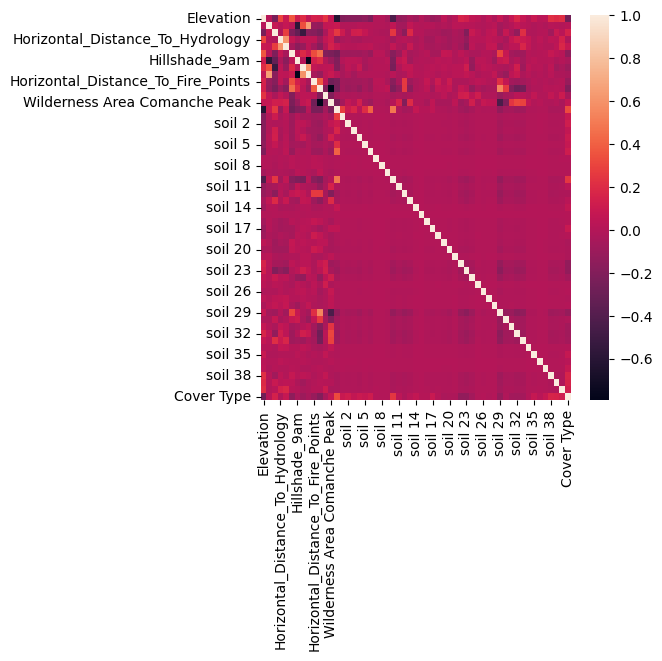

In [8]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(df.corr())

# Distribution

<AxesSubplot: >

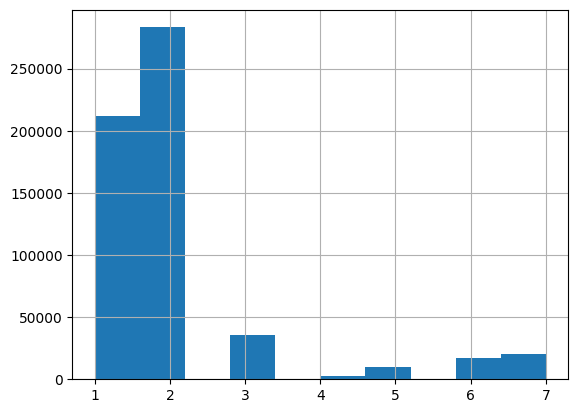

In [9]:
df["Cover Type"].hist()

# Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
x = df[x_variables]
y = df["Cover Type"]

In [17]:
scaler = MinMaxScaler()

scaler.fit(x)

X_scaled = scaler.transform(x)

# Rebalancing

Class=4, n=283301 (14.286%)
Class=1, n=283301 (14.286%)
Class=0, n=283301 (14.286%)
Class=6, n=283301 (14.286%)
Class=2, n=283301 (14.286%)
Class=5, n=283301 (14.286%)
Class=3, n=283301 (14.286%)


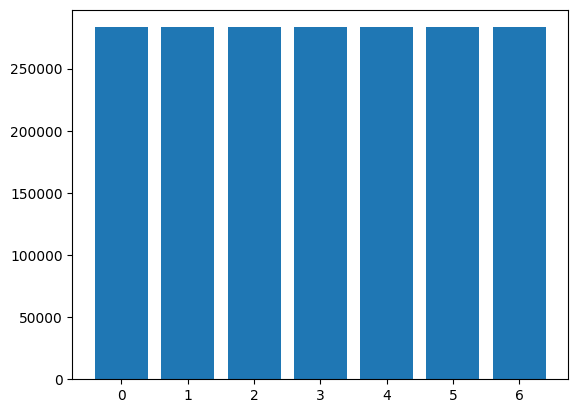

In [24]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X_scaled, y = oversample.fit_resample(x, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()